### importing libraries


In [1]:
pip install tensorflowjs

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import kagglehub
import os
import tensorflowjs as tf


NotFoundError: c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_decision_forests\tensorflow\ops\inference\inference.so not found

### loading data

In [ ]:
# Unduh dataset
path = kagglehub.dataset_download("jocelyndumlao/cardiovascular-disease-dataset")

# Path ke file CSV
csv_path = os.path.join(path, 'Cardiovascular_Disease_Dataset', 'Cardiovascular_Disease_Dataset.csv')

# Baca dataset dengan separator koma
data = pd.read_csv(csv_path)

# Cek hasil
print("Dataset shape:", data.shape)

Dataset shape: (1000, 14)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [ ]:
data.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


# EDA

In [ ]:
target_counts=data.target.value_counts()
target_counts

,count
target,
1,580
0,420


([<matplotlib.patches.Wedge at 0x7d8cfca9a850>,
 [Text(-0.2735589045026723, 1.0654414698927848, '1'),
  Text(0.27355899764652647, -1.065441445977501, '0')],
 [Text(-0.1492139479105485, 0.5811498926687917, '58.0%'),
  Text(0.14921399871628713, -0.5811498796240914, '42.0%')])

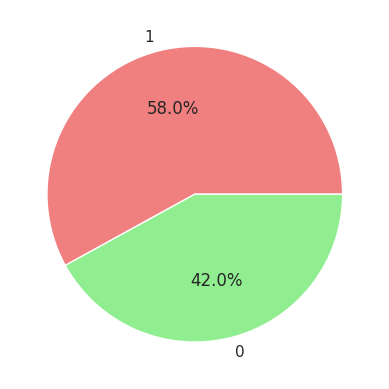

In [ ]:
plt.pie(target_counts,labels=target_counts.index,autopct='%1.1f%%',colors=['lightcoral','lightgreen'])


#### Age distribution

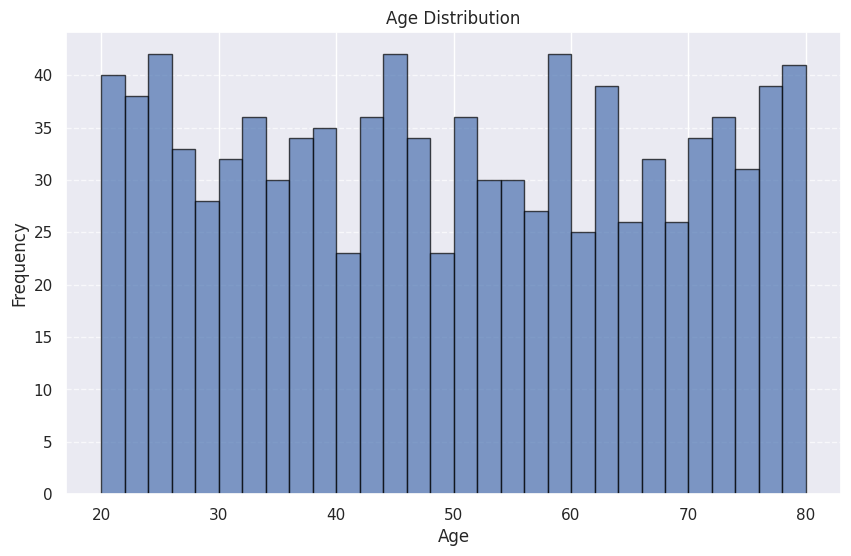

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Slope of the peak exercise ST segment vs heart disease

In [ ]:
grouped_data = data.groupby(['slope', 'target']).size().unstack()
grouped_data

target,0,1
slope,,
0,180.0,NaN
1,228.0,71.0
2,12.0,310.0
3,NaN,199.0


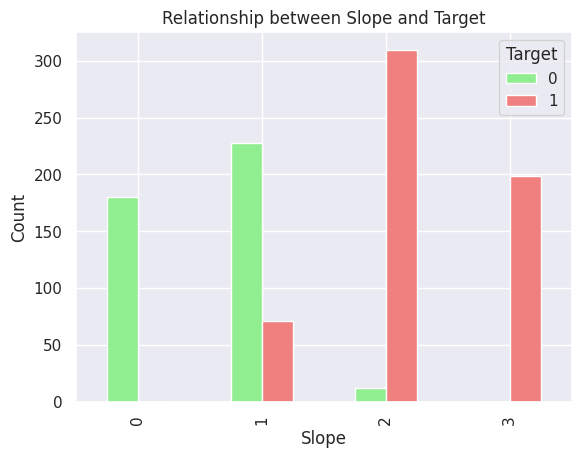

In [ ]:
grouped_data.plot(kind='bar', stacked=False,color=["lightgreen","lightcoral"])
plt.xlabel('Slope')
plt.ylabel('Count')
plt.title('Relationship between Slope and Target')
plt.legend(title='Target')
plt.show()

Scatter Plot: Resting BP vs. Serum Cholesterol (Colored by Heart Disease)

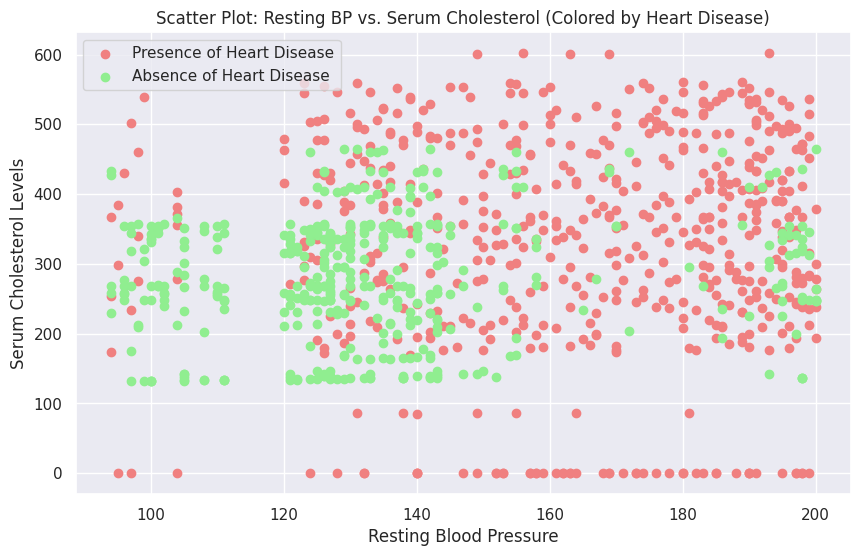

In [ ]:
heart_disease = data[data['target'] == 1]
no_heart_disease = data[data['target'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(heart_disease['restingBP'], heart_disease['serumcholestrol'], color='lightcoral', label='Presence of Heart Disease')
plt.scatter(no_heart_disease['restingBP'], no_heart_disease['serumcholestrol'], color='lightgreen', label='Absence of Heart Disease')

plt.xlabel('Resting Blood Pressure')
plt.ylabel('Serum Cholesterol Levels')
plt.title('Scatter Plot: Resting BP vs. Serum Cholesterol (Colored by Heart Disease)')
plt.legend()

plt.show()

Comparison of Resting Blood Pressure by Heart Disease Presence

<ipython-input-30-a9e2c2fb43c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='restingBP', data=data, palette=colors)


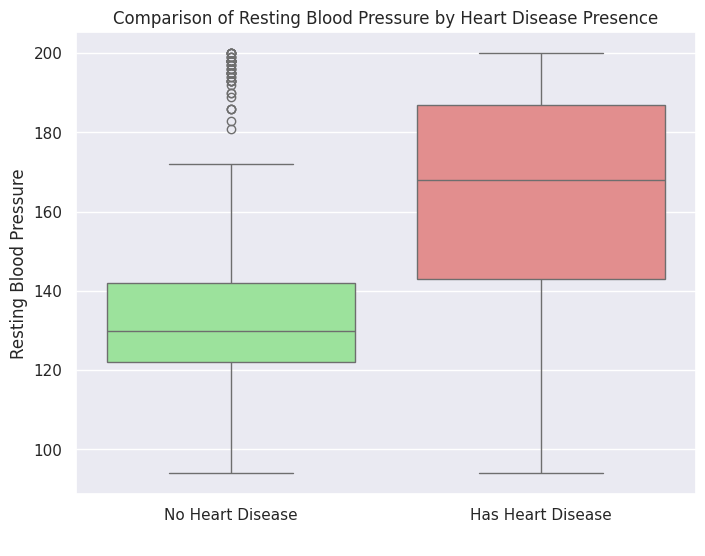

In [ ]:
colors = ["lightgreen","lightcoral"]
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='restingBP', data=data, palette=colors)
plt.title('Comparison of Resting Blood Pressure by Heart Disease Presence')
plt.xlabel(' ')
plt.ylabel('Resting Blood Pressure')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Has Heart Disease'])

plt.show()

ST segment depression vs heart disease

<ipython-input-31-5d5b3d88fd10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='oldpeak', data=data, palette=["lightgreen","lightcoral"])


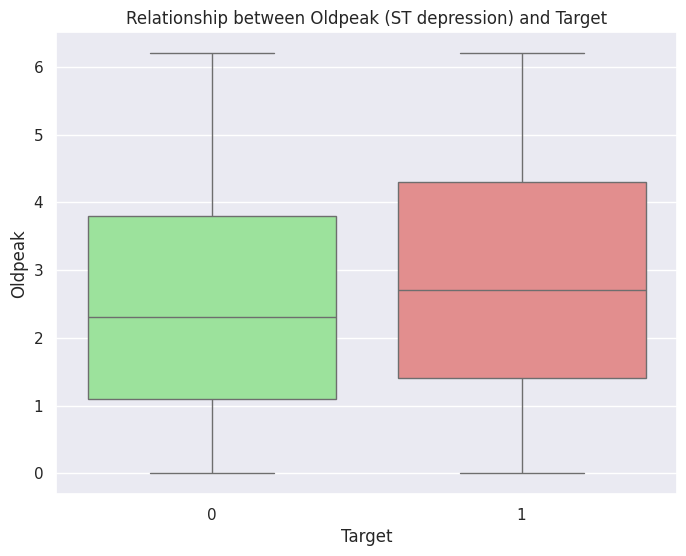

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='oldpeak', data=data, palette=["lightgreen","lightcoral"])
plt.xlabel('Target')
plt.ylabel('Oldpeak')
plt.title('Relationship between Oldpeak (ST depression) and Target')
plt.show()

Relationship between Serum Cholesterol and Target (Violin Plot)

<ipython-input-32-27b0d24b373e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='serumcholestrol', data=data,palette=["lightcoral","lightgreen"] )


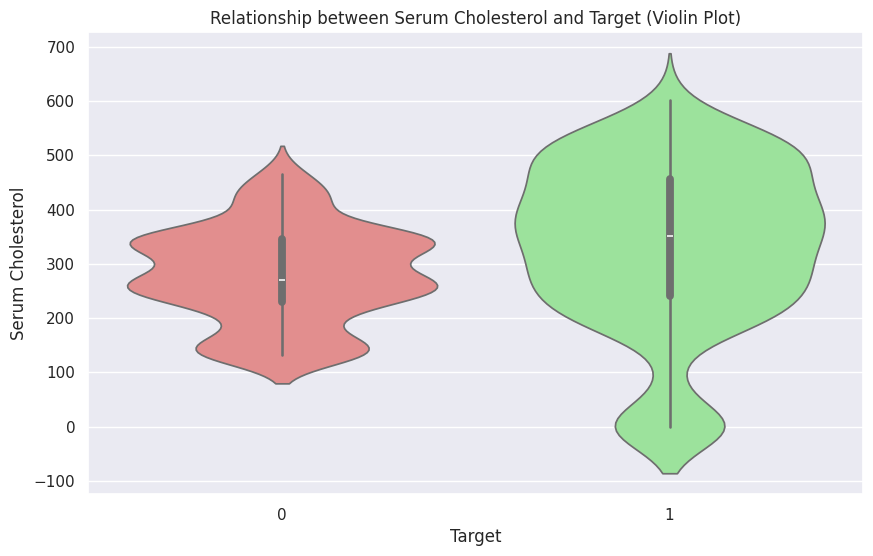

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='serumcholestrol', data=data,palette=["lightcoral","lightgreen"] )
plt.xlabel('Target')
plt.ylabel('Serum Cholesterol')
plt.title('Relationship between Serum Cholesterol and Target (Violin Plot)')
plt.show()

In [ ]:
grouped_data2 = data.groupby(['exerciseangia', 'target']).size().unstack()
grouped_data2

target,0,1
exerciseangia,,
0,201,301
1,219,279


<Figure size 1000x800 with 0 Axes>

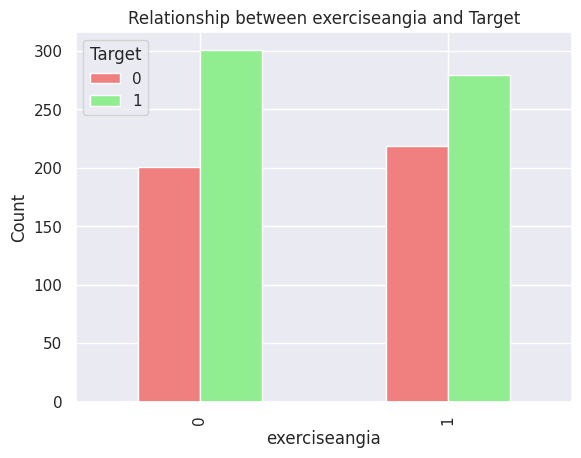

In [ ]:
plt.figure(figsize=(10, 8))
grouped_data2.plot(kind='bar', stacked=False, color=["lightcoral", 'lightgreen'])
plt.xlabel('exerciseangia')
plt.ylabel('Count')
plt.title('Relationship between exerciseangia and Target')
plt.legend(title='Target')

plt.show()

In [ ]:
### Sex vs Target

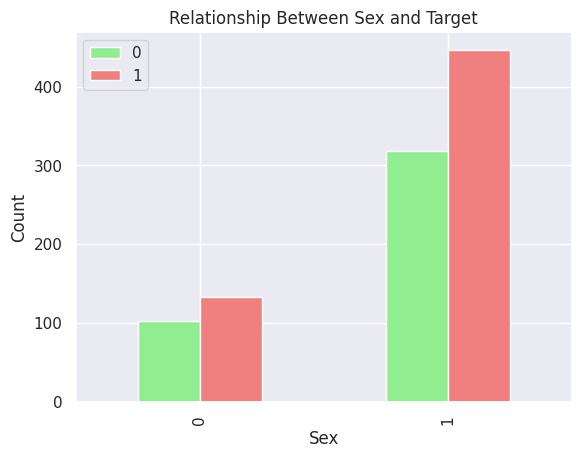

In [ ]:
sex_target_counts = data.groupby(["gender", "target"]).size().unstack()
sex_target_counts.plot.bar(color=['lightgreen', 'lightcoral'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Relationship Between Sex and Target")
plt.legend(sex_target_counts.columns)
plt.show()

Maximum Heart Rate by Chest Pain Type

<ipython-input-37-2d2e11b527ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='chestpain', y='maxheartrate', data=data, palette='YlOrRd')


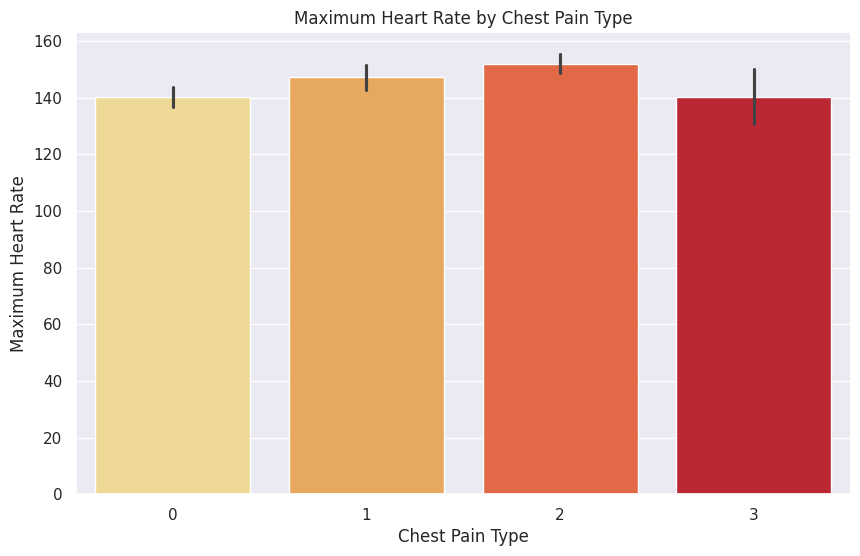

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=data, palette='YlOrRd')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

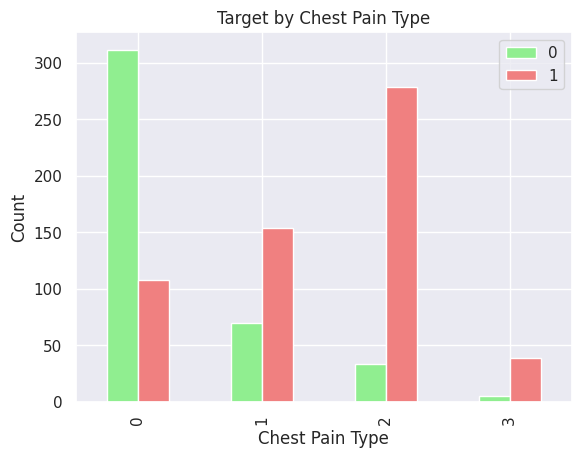

In [ ]:
chestpain_target_counts = data.groupby(["chestpain", "target"]).size().unstack()
chestpain_target_counts.plot.bar(stacked=False, color=['lightgreen', 'lightcoral'])
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Target by Chest Pain Type")
plt.legend(chestpain_target_counts.columns)
plt.show()

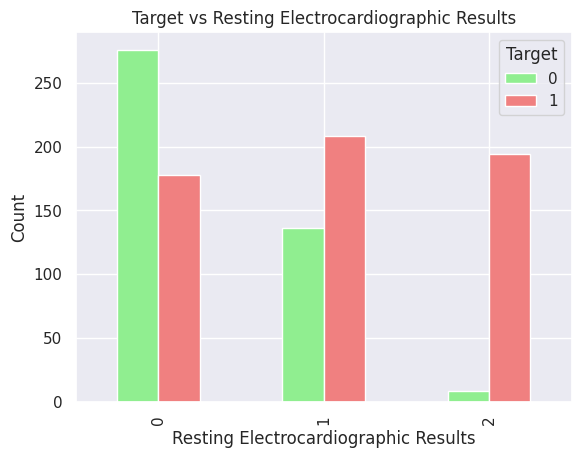

In [ ]:
restingelectro_target_counts = data.groupby(["restingrelectro", "target"]).size().unstack()

restingelectro_target_counts.plot(kind="bar", stacked=False,color=['lightgreen', 'lightcoral'])
plt.xlabel("Resting Electrocardiographic Results")
plt.ylabel("Count")
plt.title("Target vs Resting Electrocardiographic Results")
plt.legend(title="Target")
plt.show()

## PREPARATION FOR ML

In [ ]:
features = list(data.columns)
features.remove('target')
data1 = data[features + ['target']]

In [ ]:
data1

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


### Correlation matrix

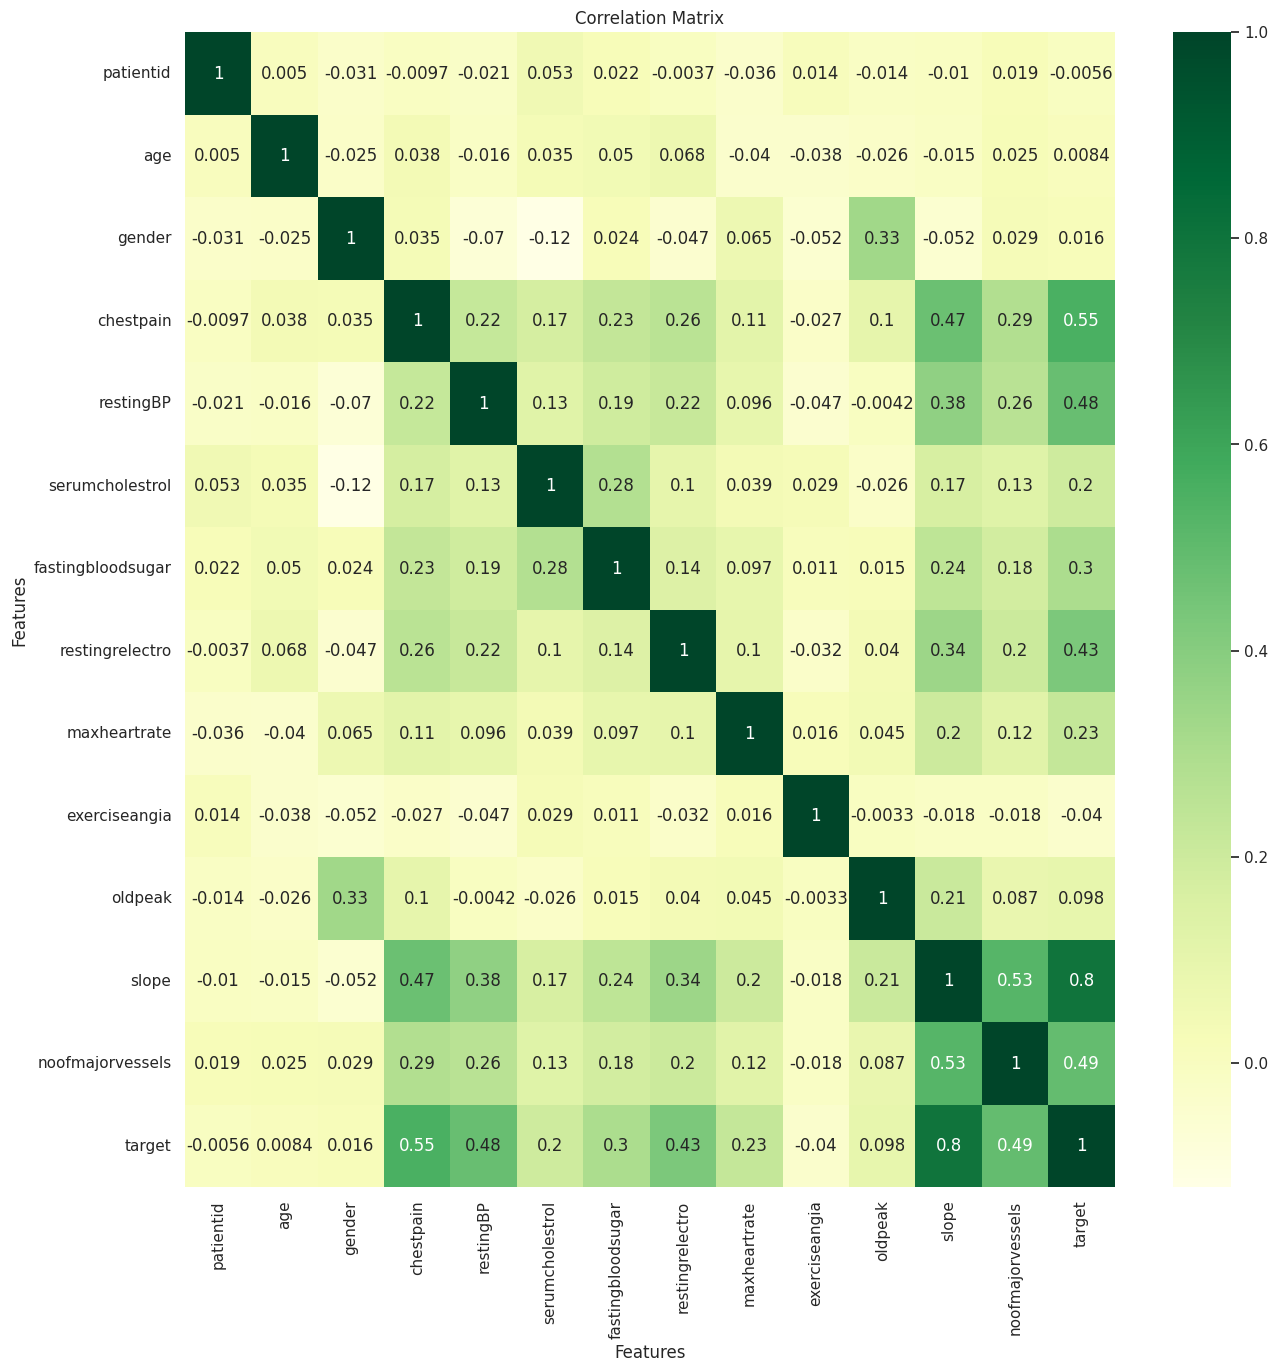

In [ ]:
correlation_matrix = data1.corr()
fig,ax=plt.subplots(figsize=(15,15))

ax=sns.heatmap(correlation_matrix, annot=True, cmap="YlGn")

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X=data1.drop(['patientid','target'],axis=1)
X.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels'],
      dtype='object')

In [ ]:
y=data1['target']
patientid=data1['patientid']

## Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, patientid, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
hyperparameters = {
    'penalty': 'l2',
    'solver': 'lbfgs',  # Solver algorithm
    'max_iter': 100  # number of iterations
}

In [ ]:
model_log = LogisticRegression(**hyperparameters)
result_log=model_log.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_log_pred = model_log.predict(X_test)
y_log_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_log_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_log_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        83
           1       0.93      0.97      0.95       117

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [ ]:
from sklearn import metrics

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test, y_log_pred)
confusion_matrix

array([[ 75,   8],
       [  3, 114]])

### using statsmodel.api

In [ ]:
import statsmodels.api as sm

In [ ]:
logit_model = sm.Logit(y_train, X_train)
result_smlog = logit_model.fit()

print(result_smlog.summary())

Optimization terminated successfully.
         Current function value: 0.163530
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.7598
Time:                        12:09:20   Log-Likelihood:                -130.82
converged:                       True   LL-Null:                       -544.55
Covariance Type:            nonrobust   LLR p-value:                2.402e-170
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.0344      0.009     -3.964      0.000      -0.051      -0.017
gender  

In [ ]:
smlog_pred=result_smlog.predict(X_test)
smlog_pred_binary = (smlog_pred >= 0.5).astype(int)

In [ ]:
accuracy_logit = accuracy_score(y_test, smlog_pred_binary)
print("Accuracy:", accuracy_logit)

Accuracy: 0.93


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc_score = roc_auc_score(y_test, smlog_pred_binary)
auc_score

np.float64(0.9209144269385233)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, smlog_pred_binary)

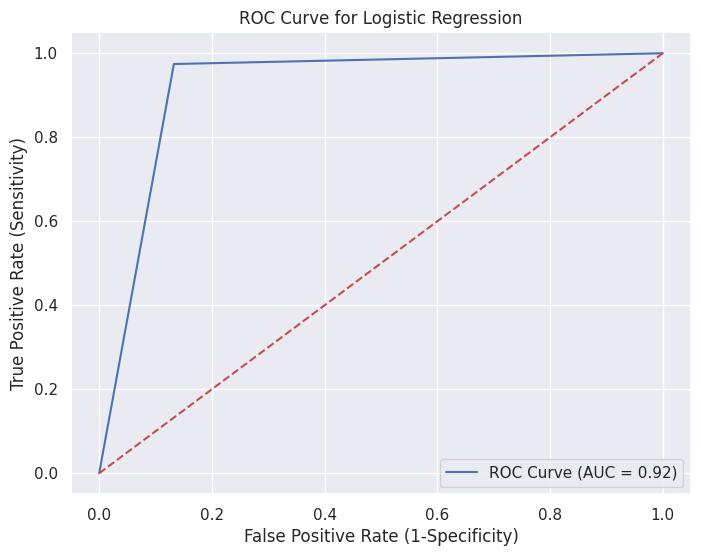

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cmlg = confusion_matrix(y_test, smlog_pred_binary)


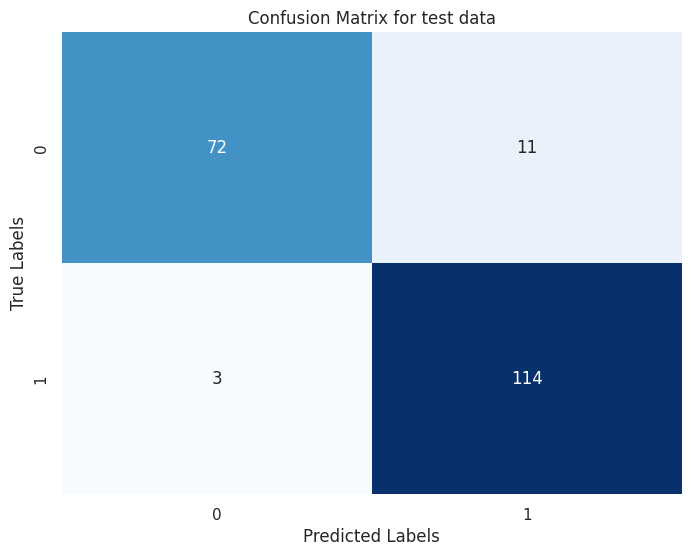

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmlg, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test data')
plt.show()

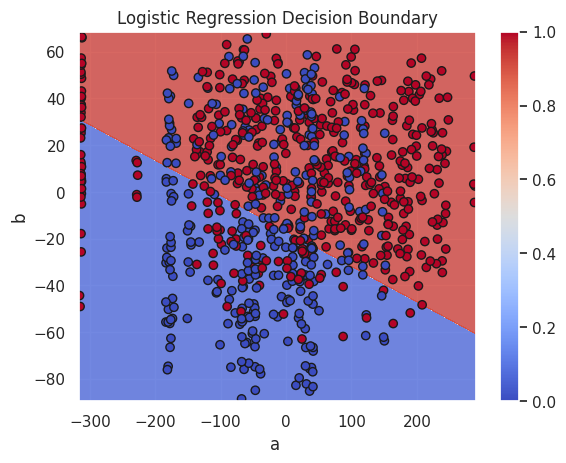

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dimensionality of the feature space using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Train a logistic regression model on the reduced feature space
model_log_pca = LogisticRegression(**hyperparameters)
model_log_pca.fit(X_train_pca, y_train)

# Define a meshgrid for the reduced feature space
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Calculate the predicted probabilities for each point in the meshgrid
Z = model_log_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary along with the training data points in the reduced space
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('a ')
plt.ylabel('b')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar()
plt.show()

## Normalization

### (Normalization not necessary for logistic regression)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_reg=DecisionTreeRegressor()
dt_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [ ]:
ypred_dt=dt_reg.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
pred_dt = dt_reg.predict(X_test_scaled)
pred_list_dt = pd.DataFrame({'patientid': id_test, 'actual_target': y_test, 'predicted_target': pred_dt})
print(pred_list_dt.dropna())

     patientid  actual_target  predicted_target
521    5125568              1               1.0
737    7527664              0               0.0
740    7585452              0               0.0
660    6781392              0               0.0
411    4102655              1               1.0
..         ...            ...               ...
408    4074097              1               1.0
332    3245660              0               0.0
208    2104974              0               0.0
613    6231193              1               1.0
78      914670              1               1.0

[200 rows x 3 columns]


In [ ]:
mean_squared_error(y_test, ypred_dt)

0.035

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, ypred_dt)

0.8558335907733499

In [ ]:
accuracy_score(y_test, ypred_dt)

0.965

In [ ]:
from sklearn.metrics import confusion_matrix

cmdt = confusion_matrix(y_test, ypred_dt)

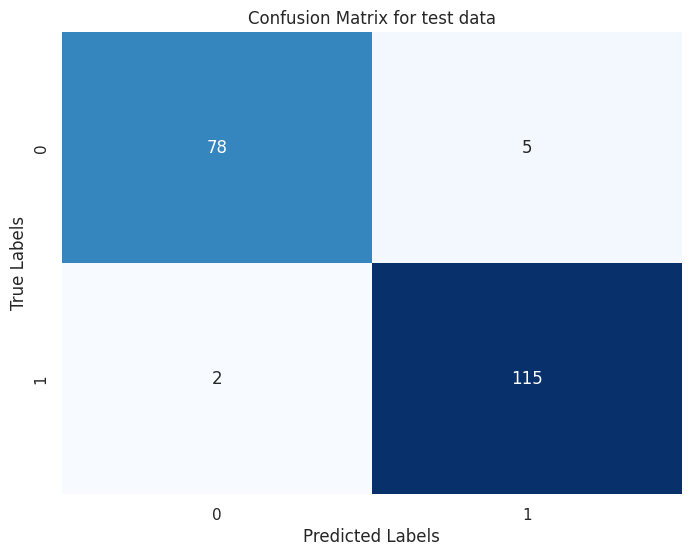

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmdt, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test data')
plt.show()

In [ ]:
#ROC
fpr_ds, tpr_ds, thresholds = roc_curve(y_test, ypred_dt)

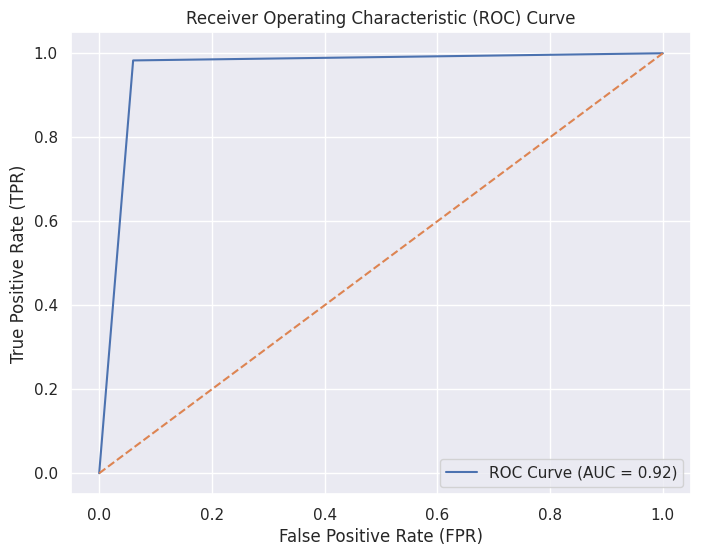

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_ds, tpr_ds, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
ypred_rf = rf_reg.predict(X_test_scaled)
ypred_rf_binary=(ypred_rf > 0.5).astype(int)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse_rf = mean_squared_error(y_test, ypred_rf_binary)
print("Mean Squared Error:", mse_rf)

Mean Squared Error: 0.03


In [ ]:
r2_rf = r2_score(y_test, ypred_rf_binary)
print("R2 Score:", r2_rf)

R2 Score: 0.8764287920914426


In [ ]:
accr = accuracy_score(y_test, ypred_rf_binary)
print("accuracy:", accr)

accuracy: 0.97


In [ ]:
cmrf = confusion_matrix(y_test, ypred_rf_binary)

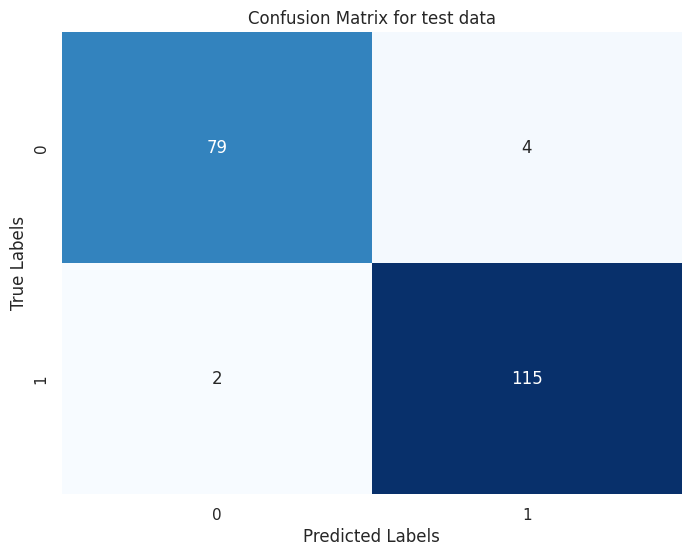

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmrf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test data')
plt.show()

In [ ]:
#ROC
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, ypred_rf_binary)

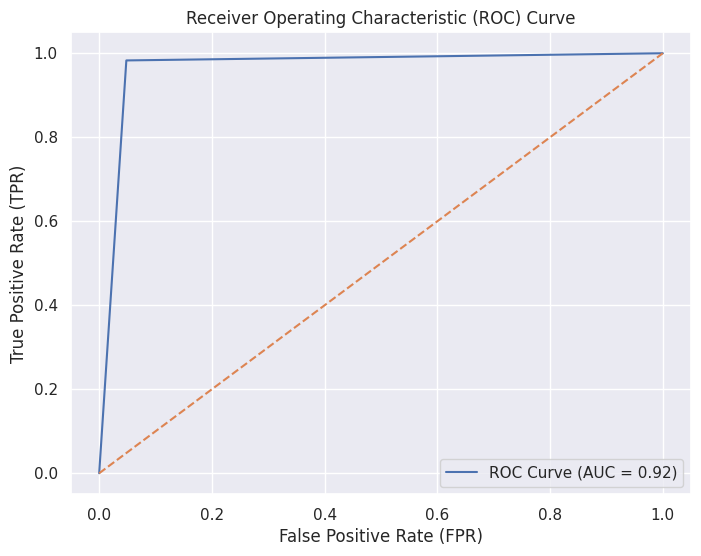

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

SVC()

In [ ]:
ypred_svm = svm_clf.predict(X_test_scaled)
ypred_svm_binary = (ypred_svm > 0.5).astype(int)

In [ ]:
cmsvm = confusion_matrix(y_test, ypred_svm_binary)

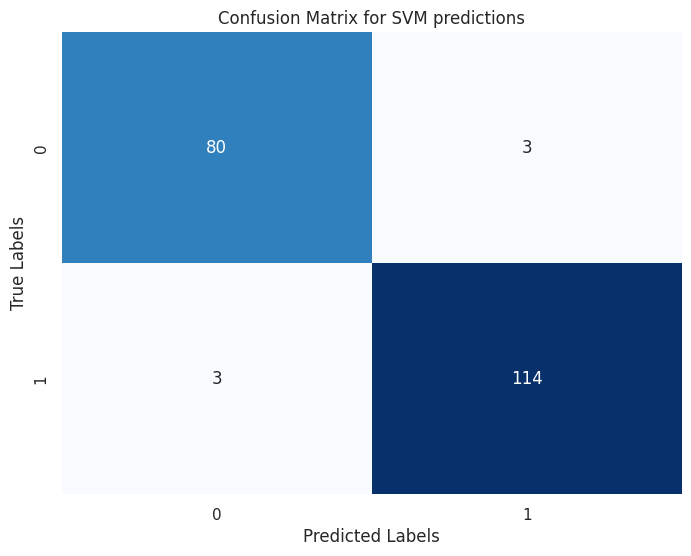

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmsvm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM predictions')
plt.show()

In [ ]:
accuracy_score(y_test, ypred_svm_binary)

0.97

# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
ypred_knn = knn_clf.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, ypred_knn)

0.935

In [ ]:
cmknn = confusion_matrix(y_test, ypred_knn)

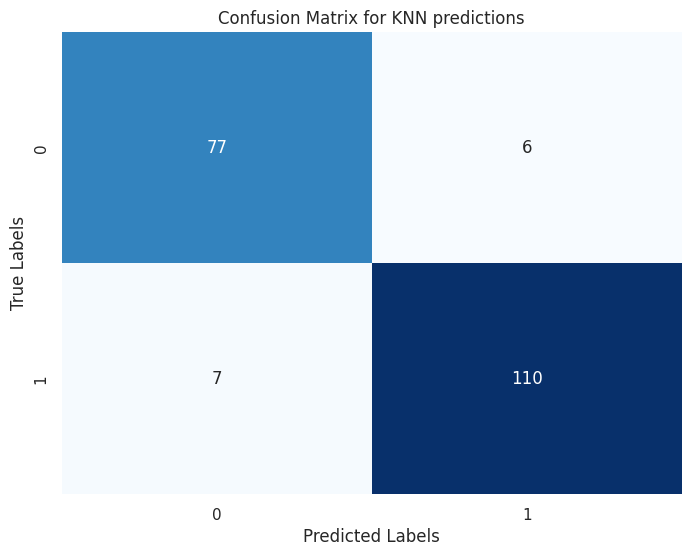

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmknn, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN predictions')
plt.show()

# Comparison of different models

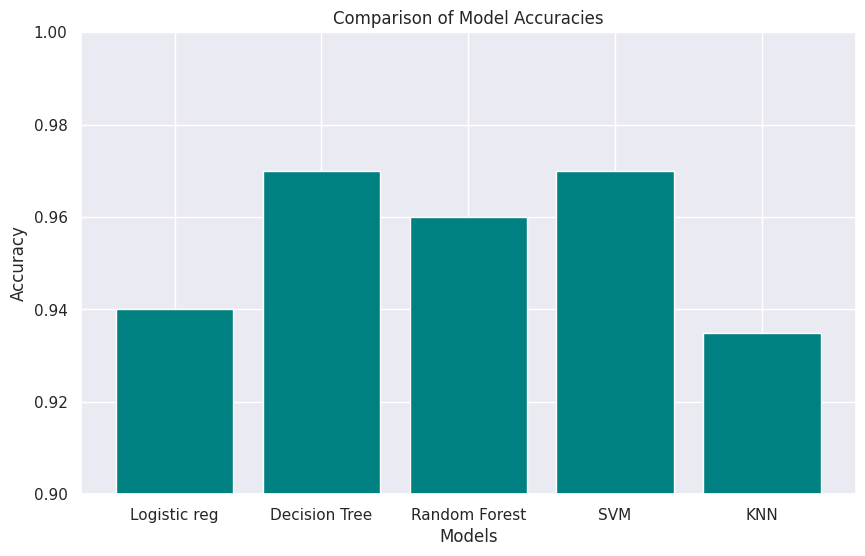

In [ ]:
accuracies = {
    "Logistic reg": 0.94,
    "Decision Tree":.97,
    'Random Forest': 0.96,
    'SVM': 0.97,
    'KNN': 0.935
}

models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color='teal')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.9, 1.0)
plt.show()

# Deep Learning method with tensorflow

In [ ]:
import tensorflow as tf

#### dropout regularization

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=80, batch_size=20, validation_split=0.2)

Epoch 1/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6065 - loss: 0.6316 - val_accuracy: 0.7250 - val_loss: 0.5349
Epoch 2/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7778 - loss: 0.4686 - val_accuracy: 0.8938 - val_loss: 0.3177
Epoch 3/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9154 - loss: 0.2421 - val_accuracy: 0.9187 - val_loss: 0.2237
Epoch 4/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9264 - loss: 0.1901 - val_accuracy: 0.9375 - val_loss: 0.2155
Epoch 5/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9234 - loss: 0.1858 - val_accuracy: 0.9312 - val_loss: 0.1591
Epoch 6/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9467 - loss: 0.1389 - val_accuracy: 0.9500 - val_loss: 0.1342
Epoch 7/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9204 - loss: 0.1567 - val_accuracy: 0.9563 - val_loss: 0.1232
Epoch 8/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9634 - loss: 0.1280 - val_accuracy: 0.9438 - val_loss

In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.97


##batch normalization

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=40, validation_split=0.2)

Epoch 1/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5444 - loss: 0.7545 - val_accuracy: 0.5375 - val_loss: 0.6188
Epoch 2/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8644 - loss: 0.3220 - val_accuracy: 0.5375 - val_loss: 0.5945
Epoch 3/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9124 - loss: 0.2430 - val_accuracy: 0.5562 - val_loss: 0.5743
Epoch 4/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9246 - loss: 0.2088 - val_accuracy: 0.6187 - val_loss: 0.5448
Epoch 5/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9372 - loss: 0.1694 - val_accuracy: 0.7000 - val_loss: 0.4973
Epoch 6/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9438 - loss: 0.1473 - val_accuracy: 0.7437 - val_loss: 0.4623
Epoch 7/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9445 - loss: 0.1567 - val_accuracy: 0.7688 - val_loss: 0.4114
Epoch 8/40
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9493 - loss: 0.1314 - val_accuracy: 0.8000 - val_loss

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9783 - loss: 0.0680  
Test Loss: 0.06605836004018784, Test Accuracy: 0.9800000190734863


#### L2-regularization

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model_l2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
deepmodel= model.fit(X_train_scaled, y_train, epochs=40, batch_size=20, validation_split=0.2)

Epoch 1/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9573 - loss: 0.1231 - val_accuracy: 0.9563 - val_loss: 0.1144
Epoch 2/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9684 - loss: 0.0994 - val_accuracy: 0.9500 - val_loss: 0.1197
Epoch 3/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9613 - loss: 0.0901 - val_accuracy: 0.9500 - val_loss: 0.1170
Epoch 4/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9535 - loss: 0.1215 - val_accuracy: 0.9500 - val_loss: 0.1209
Epoch 5/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.1039 - val_accuracy: 0.9500 - val_loss: 0.1272
Epoch 6/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9746 - loss: 0.0737 - val_accuracy: 0.9563 - val_loss: 0.1142
Epoch 7/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9701 - loss: 0.0663 - val_accuracy: 0.9563 - val_loss: 0.1051
Epoch 8/40
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9771 - loss: 0.0691 - val_accuracy: 0.9375 - val_loss

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9822 - loss: 0.0465  
Test Loss: 0.06483359634876251, Test Accuracy: 0.9800000190734863


## Neural Network model gives higher accuracy compared to ML Models

In [ ]:
model_l2.save('model_l2.h5')


In [ ]:
!tensorflowjs_converter --input_format=keras model_l2.h5 model_l2_tfjs/

2025-05-04 12:19:01.230094: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746361141.281826    8171 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746361141.298996    8171 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
import shutil
from google.colab import files

# 1. Kompres folder TensorFlow.js
shutil.make_archive('/content/model_l2_tfjs', 'zip', '/content/model_l2_tfjs')

# 2. Kompres file .h5 (ini hanya membungkusnya sebagai ZIP, bukan seperti folder)
shutil.make_archive('/content/model_l2', 'zip', root_dir='/content', base_dir='model_l2.h5')

# 3. Unduh file ZIP-nya
files.download('/content/model_l2_tfjs.zip')
files.download('/content/model_l2.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>